In [1]:
import cartopy.crs as ccrs
import healpix as hp
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import easygems.healpix as egh
import easygems.remap as egr

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [49]:
ds1 = xr.open_dataset('/work/scratch-nopw2/mmuetz/wcrp_hackathon/OLR/20200101T0000Z_pa000.hpz10.easygems_delaunay.nc')
ds2 = xr.open_dataset('/work/scratch-nopw2/mmuetz/wcrp_hackathon/OLR/20200101T0000Z_pa000.hpz10.earth2grid.nc')

/tmp/ipykernel_802/709279679.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds1 = xr.open_dataset('/work/scratch-nopw2/mmuetz/wcrp_hackathon/OLR/20200101T0000Z_pa000.hpz10.easygems_delaunay.nc')
/tmp/ipykernel_802/709279679.py:2: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds2 = xr.open_dataset('/work/scratch-nopw2/mmuetz/wcrp_hackathon/OLR/20200101T0000Z_pa000.hpz10.earth2grid.nc')


In [50]:
ds1

<xarray.Dataset> Size: 201MB
Dimensions:                     (cell: 12582912)
Coordinates:
    forecast_period             timedelta64[ns] 8B ...
    forecast_reference_time     datetime64[ns] 8B ...
    time                        datetime64[ns] 8B ...
  * cell                        (cell) int64 101MB 0 1 2 ... 12582910 12582911
Data variables:
    toa_outgoing_longwave_flux  (cell) float64 101MB ...
Attributes:
    standard_name:    toa_outgoing_longwave_flux
    units:            W m-2
    um_stash_source:  m01s02i205
    source:           Data from Met Office Unified Model
    um_version:       11.7
    cell_methods:     time: mean (interval: 1 hour)
    grid_mapping:     healpix_nested
    healpix_zoom:     10
    suite:            u-cu087

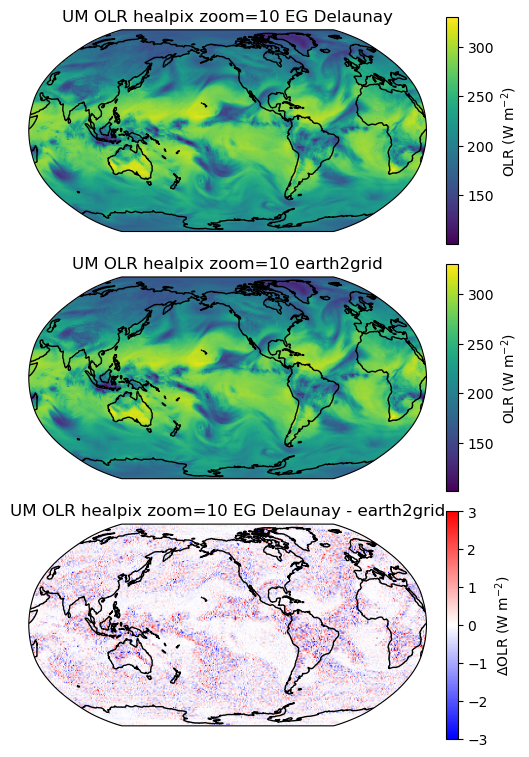

In [51]:
projection = ccrs.Robinson(central_longitude=-135.5808361)
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 7.5), subplot_kw={'projection': projection}, layout='constrained')
zoom = 10
ax0.set_title(f'UM OLR healpix zoom={zoom} EG Delaunay')
ax0.set_global()
im = egh.healpix_show(ds1.toa_outgoing_longwave_flux.values, ax=ax0);
plt.colorbar(im, label='OLR (W m$^{-2}$)')
ax0.coastlines()

ax1.set_title(f'UM OLR healpix zoom={zoom} earth2grid')
ax1.set_global()
im = egh.healpix_show(ds2.toa_outgoing_longwave_flux.values, ax=ax1);
plt.colorbar(im, label='OLR (W m$^{-2}$)')
ax1.coastlines();

ax2.set_title(f'UM OLR healpix zoom={zoom} EG Delaunay - earth2grid')
ax2.set_global()
im = egh.healpix_show(ds1.toa_outgoing_longwave_flux.values - ds2.toa_outgoing_longwave_flux.values, ax=ax2, cmap='bwr', vmin=-3, vmax=3);
plt.colorbar(im, label=r'$\Delta$OLR (W m$^{-2}$)')
ax2.coastlines();


In [52]:
def rmse(a1, a2):
    return np.sqrt(np.nanmean((a1 - a2)**2))

In [53]:
rmse(ds1.toa_outgoing_longwave_flux.values, ds2.toa_outgoing_longwave_flux.values)

np.float64(0.5958288168398985)

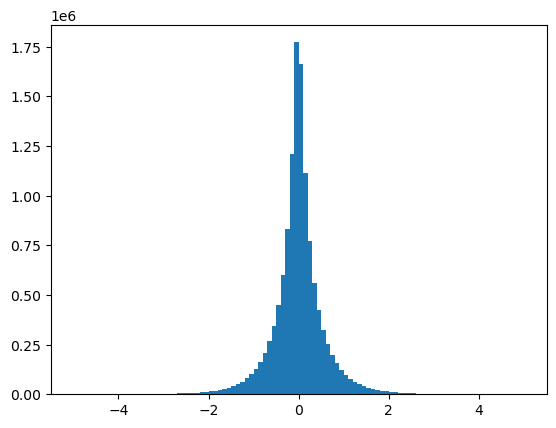

In [54]:
plt.hist(ds1.toa_outgoing_longwave_flux.values - ds2.toa_outgoing_longwave_flux.values, bins=np.linspace(-5, 5, 101));

In [55]:
np.nanpercentile(ds1.toa_outgoing_longwave_flux.values - ds2.toa_outgoing_longwave_flux.values, [5, 95])

array([-0.91366309,  0.90051438])

In [56]:
ds1.toa_outgoing_longwave_flux

<xarray.DataArray 'toa_outgoing_longwave_flux' (cell: 12582912)> Size: 101MB
array([294.039559, 294.12338 , 293.967401, ..., 209.077173, 204.706729,
       205.178574])
Coordinates:
    forecast_period          timedelta64[ns] 8B ...
    forecast_reference_time  datetime64[ns] 8B ...
    time                     datetime64[ns] 8B ...
  * cell                     (cell) int64 101MB 0 1 2 ... 12582910 12582911

In [57]:
ds3 = xr.open_dataset('/work/scratch-nopw2/mmuetz/wcrp_hackathon/pe_T/20200101T0000Z_pe000.hpz10.easygems_delaunay.nc')

/tmp/ipykernel_802/821719261.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds3 = xr.open_dataset('/work/scratch-nopw2/mmuetz/wcrp_hackathon/pe_T/20200101T0000Z_pe000.hpz10.easygems_delaunay.nc')


In [43]:
ds3

<xarray.Dataset> Size: 5GB
Dimensions:                  (time: 5, pressure: 10, cell: 12582912)
Coordinates:
  * time                     (time) datetime64[ns] 40B 2020-01-01 ... 2020-01-02
  * pressure                 (pressure) float32 40B 200.0 250.0 ... 950.0 1e+03
    forecast_period          (time) timedelta64[ns] 40B ...
    forecast_reference_time  datetime64[ns] 8B ...
  * cell                     (cell) int64 101MB 0 1 2 ... 12582910 12582911
Data variables:
    air_temperature          (time, pressure, cell) float64 5GB ...
Attributes:
    standard_name:    air_temperature
    units:            K
    um_stash_source:  m01s16i203
    source:           Data from Met Office Unified Model
    um_version:       11.7
    grid_mapping:     healpix_nested
    healpix_zoom:     10
    suite:            u-cu087

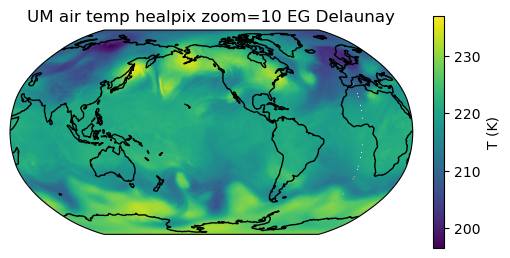

In [44]:
projection = ccrs.Robinson(central_longitude=-135.5808361)
fig, ax0 = plt.subplots(1, 1, figsize=(5, 2.5), subplot_kw={'projection': projection}, layout='constrained')
zoom = 10
ax0.set_title(f'UM air temp healpix zoom={zoom} EG Delaunay')
ax0.set_global()
im = egh.healpix_show(ds3.isel(time=0, pressure=0).air_temperature.values, ax=ax0);
plt.colorbar(im, label='T (K)')
ax0.coastlines();